# Pruebas con Arima con variables exógenas

En este note vamos a ilustrar la forma en la que podemos ultilizar variables auxiliares para generar modelos de series temporales con predictores, es decir multivariantes! 

https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_sarimax_stata.html#ARIMA-Example-4:-ARMAX-(Friedman)

In [36]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import statsmodels.tsa.holtwinters as ets

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Nuestras Funciones
exec(open(r'C:\Users\Guille\Documents\Material Minería de Datos 2023_2024\Materíal Minería de Datos 2023_24_Gr3\NuestrasFunciones.py').read())


In [37]:
# Lectura de datos
catalog = pd.read_excel('catalog_seasfac.xlsx')
catalog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     120 non-null    datetime64[ns]
 1   men                      120 non-null    float64       
 2   women                    120 non-null    float64       
 3   jewel                    120 non-null    float64       
 4   mail                     120 non-null    int64         
 5   page                     120 non-null    int64         
 6   phone                    120 non-null    int64         
 7   print                    120 non-null    float64       
 8   service                  120 non-null    int64         
 9   YEAR_                    120 non-null    int64         
 10  MONTH_                   120 non-null    int64         
 11  DATE_                    120 non-null    object        
 12  Seasonal_Err_Men         120 non-nul

In [38]:
# Convertir en serie temporal
catalog.set_index(['date'],inplace=True)
catalog.head()

,men,women,jewel,mail,page,phone,print,service,YEAR_,MONTH_,DATE_,Seasonal_Err_Men,Seasonal_AdjSer_Men,Seasonal_Factors_Men,Seasonal_TrendCycle_Men
date,,,,,,,,,,,,,,,
1989-01-01,11357.92,16578.93,10776.38,7978,73,34,22294.48,20,1989,1,JAN 1989,0.919551,11932.954703,0.951811,12976.929728
1989-02-01,10605.95,18236.13,10821.97,8290,88,29,27426.47,20,1989,2,FEB 1989,0.846981,12550.902573,0.845035,14818.392791
1989-03-01,16998.57,43393.55,22845.79,8029,65,24,27978.66,26,1989,3,MAR 1989,1.496159,19971.321098,0.851149,13348.390610
1989-04-01,6563.75,30908.49,11102.62,7752,85,20,28949.65,22,1989,4,APR 1989,0.678450,7727.042000,0.849452,11389.262497
1989-05-01,6607.69,28701.58,16066.57,8685,74,17,22642.27,21,1989,5,MAY 1989,0.753748,7732.708346,0.854512,10259.006323


<AxesSubplot: xlabel='date'>

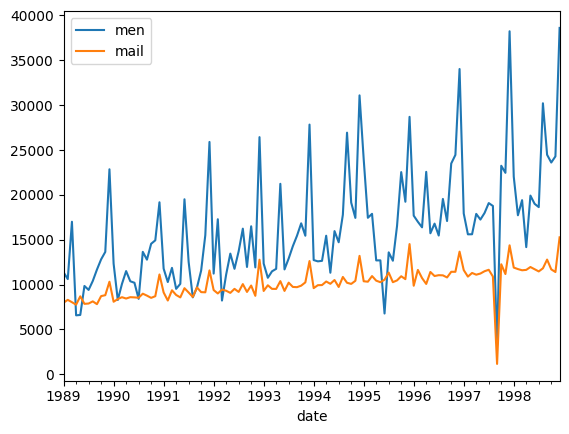

In [4]:
catalog.iloc[:,[0,3]].plot()

In [5]:
catalog.iloc[:,:8].corr()

,men,women,jewel,mail,page,phone,print,service
men,1.000000,0.802047,0.700690,0.803000,0.258917,0.771249,0.266260,0.643612
women,0.802047,1.000000,0.704813,0.681287,0.301206,0.489834,0.435682,0.681954
jewel,0.700690,0.704813,1.000000,0.453393,0.110268,0.285918,0.551267,0.265706
mail,0.803000,0.681287,0.453393,1.000000,0.139966,0.612675,0.207440,0.706077
page,0.258917,0.301206,0.110268,0.139966,1.000000,0.175110,0.075132,0.105518
phone,0.771249,0.489834,0.285918,0.612675,0.175110,1.000000,0.092101,0.663746
print,0.266260,0.435682,0.551267,0.207440,0.075132,0.092101,1.000000,0.183814
service,0.643612,0.681954,0.265706,0.706077,0.105518,0.663746,0.183814,1.000000


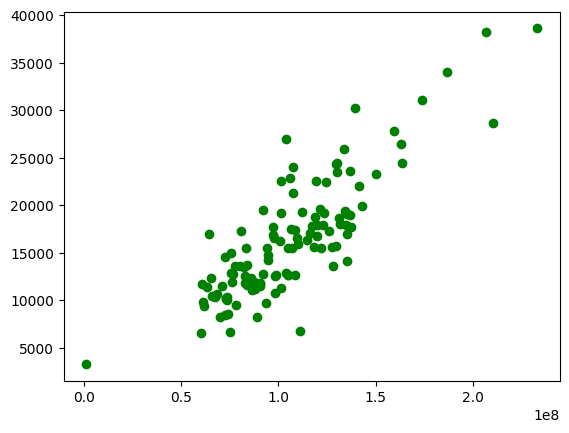

In [40]:
plt.scatter(catalog.mail**2,catalog.men, color="green")

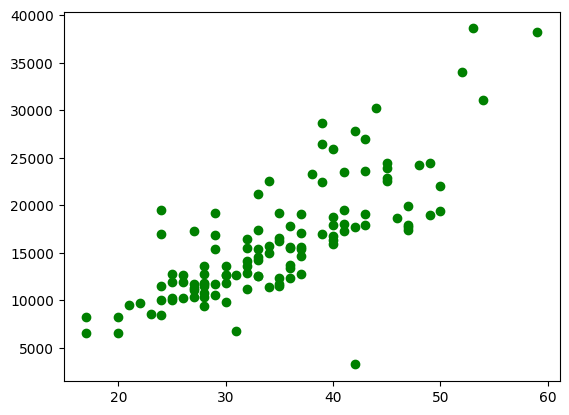

In [7]:
plt.scatter(catalog.phone,catalog.men, color="green")

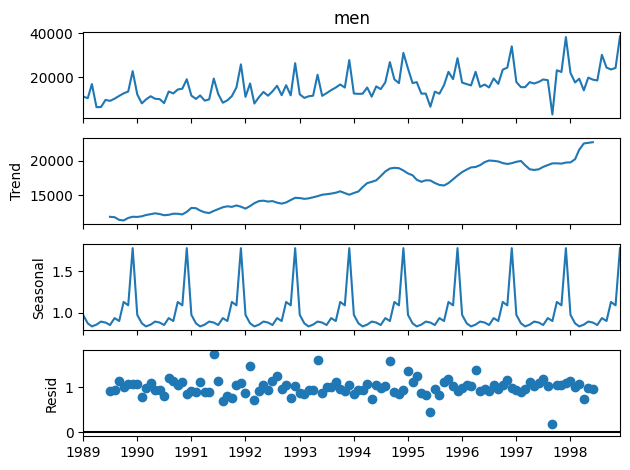

In [41]:
# Aplicar descomposición multi
catalog_desc_Mul = seasonal_decompose(catalog.men, model='multiplicative',period=12)
catalog_desc_Mul.plot()
plt.show()

In [42]:
test_stationarity(catalog_desc_Mul.resid.dropna())


Results of Dickey-Fuller Test:
Test Statistic                -6.938497e+00
p-value                        1.039650e-09
#Lags Used                     4.000000e+00
Number of Observations Used    1.030000e+02
Critical Value (1%)           -3.495493e+00
Critical Value (5%)           -2.890037e+00
Critical Value (10%)          -2.581971e+00
dtype: float64


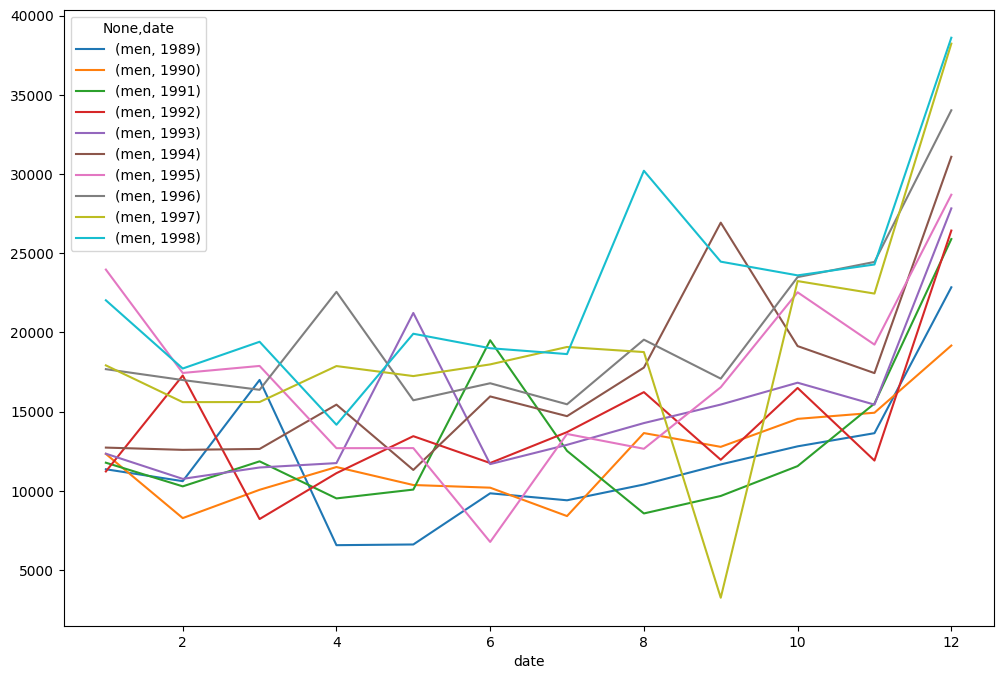

In [43]:
seasonal_plot(catalog)

<AxesSubplot: xlabel='date'>

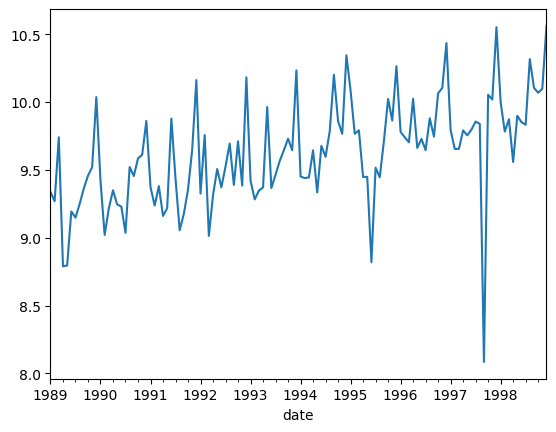

In [44]:
menLog = np.log(catalog.men)
menLog.plot()

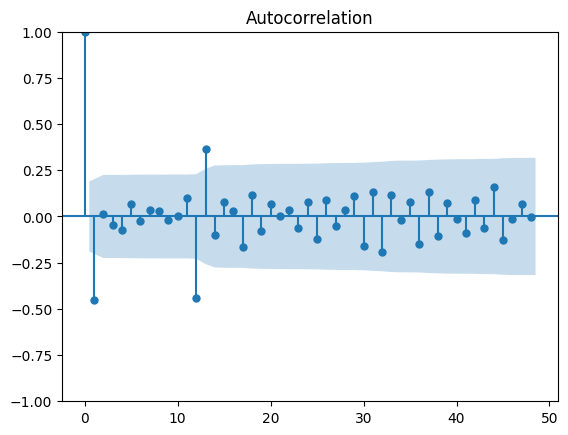

In [45]:
plot_acf(catalog.men.diff(periods=1).diff(periods=12).dropna(inplace=False),lags=48)
plt.show()

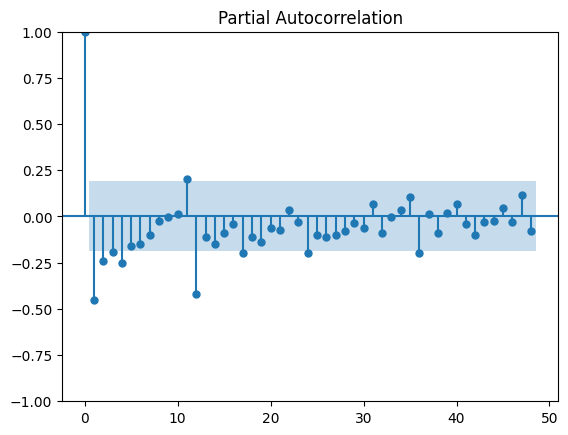

In [13]:
plot_pacf(catalog.men.diff(periods=1).diff(periods=12).dropna(inplace=False),lags=48,method='ywm')
plt.show()

In [46]:
catalog_tr = catalog[:'1996-12-01']
catalog_tst = catalog['1997-01-01':]
catalog_tst

,men,women,jewel,mail,page,phone,print,service,YEAR_,MONTH_,DATE_,Seasonal_Err_Men,Seasonal_AdjSer_Men,Seasonal_Factors_Men,Seasonal_TrendCycle_Men
date,,,,,,,,,,,,,,,
1997-01-01,17917.91,25647.49,11043.41,11611,75,40,23542.26,41,1997,1,JAN 1997,0.986809,18825.067301,0.951811,19076.701976
1997-02-01,15596.13,24421.91,11384.90,10882,81,36,27434.75,35,1997,2,FEB 1997,0.978878,18456.197525,0.845035,18854.436972
1997-03-01,15604.66,40030.11,13779.56,11288,64,37,28652.30,32,1997,3,MAR 1997,0.953769,18333.640741,0.851149,19222.307154
1997-04-01,17874.44,41055.37,12655.11,11096,87,43,31720.31,36,1997,4,APR 1997,1.055805,21042.323155,0.849452,19930.120557
1997-05-01,17242.11,46385.56,22997.57,11224,57,41,32246.55,46,1997,5,MAY 1997,0.982815,20177.733505,0.854512,20530.543598
1997-06-01,17979.72,45873.16,10989.57,11483,104,41,29281.37,44,1997,6,JUN 1997,0.994049,20765.169534,0.865860,20889.476703
1997-07-01,19080.03,45480.15,11888.01,11643,71,43,25594.92,49,1997,7,JUL 1997,1.169724,22293.065749,0.855873,19058.396630
1997-08-01,18758.66,48561.86,16730.92,10893,66,40,28863.19,50,1997,8,AUG 1997,1.168960,19725.860063,0.950968,16874.709725
1997-09-01,3245.18,31578.77,8641.83,1147,89,42,29526.59,45,1997,9,SEP 1997,0.235599,3486.579724,0.930763,14798.817474


C:\Users\Guille\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Guille\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


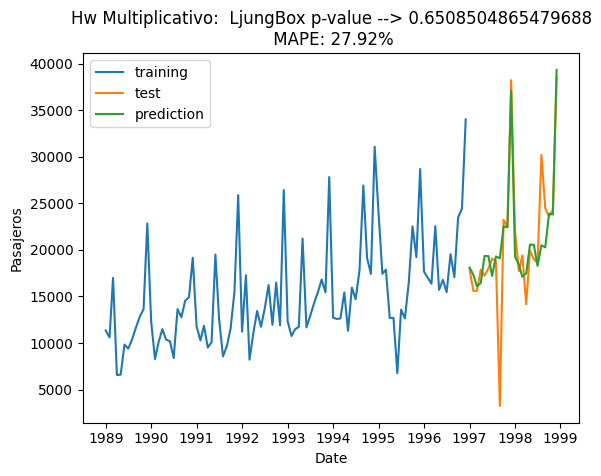

0.6508504865479688


In [47]:
hw_mul = ets.ExponentialSmoothing(catalog_tr.men,trend='add', damped_trend=False, seasonal='mul').fit()
hw_mul.summary()

eval_model(hw_mul,catalog_tr.men,catalog_tst.men,'Hw Multiplicativo')


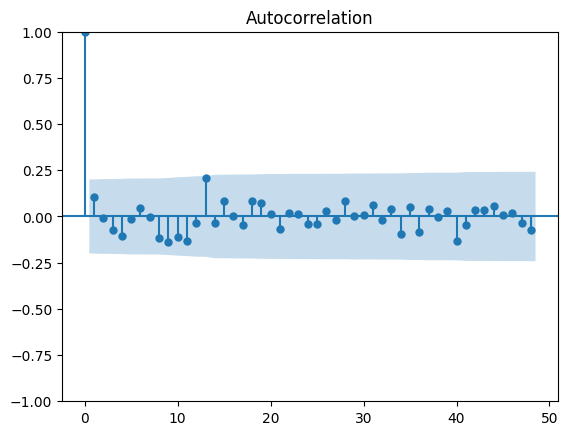

In [48]:
plot_acf(hw_mul.resid, lags=48)
plt.show()

In [51]:
arima1 = SARIMAX(catalog_tr.men, 
                order = (1, 1, 1), 
                seasonal_order =(0, 1, 1, 12))
  
arima_1 = arima1.fit()
arima_1.summary()

C:\Users\Guille\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Guille\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                men   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -809.682
Date:                            Sat, 24 Feb 2024   AIC                           1627.364
Time:                                    12:50:43   BIC                           1637.040
Sample:                                01-01-1989   HQIC                          1631.251
                                     - 12-01-1996                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2445      0.106      2.298      0.022       0.036       0.453
ma.L1         -0.8855      0.087    -10.217      0.000      -1.055      -0.716
ma.S.L12      -0.6439      0.110     -5.874      0.000      -0.859      -0.429
sigma2      1.628e+07   1.69e-09   9.64e+15      0.000    1.63e+07    1.63e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.92   Jarque-Bera (JB):                 0.62
Prob(Q):                              0.34   Prob(JB):                         0.73
Heteroskedasticity (H):               0.93   Skew:                             0.20
Prob(H) (two-sided):                  0.84   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.06e+31. Standard errors may be unstable.
"""

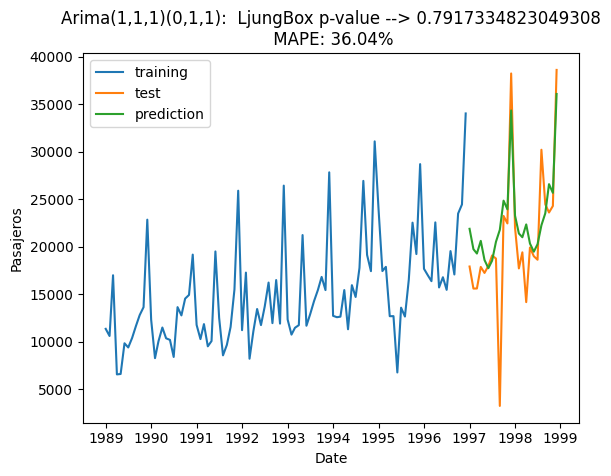

0.7917334823049308


In [52]:
eval_model(arima_1,catalog_tr.men,catalog_tst.men,'Arima(1,1,1)(0,1,1)')

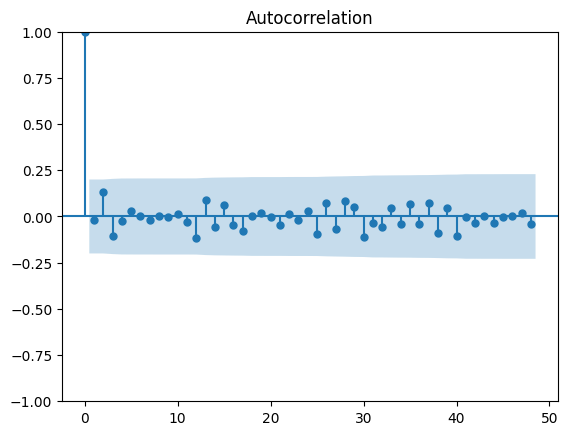

In [53]:
plot_acf(arima_1.resid, lags=48)
plt.show()

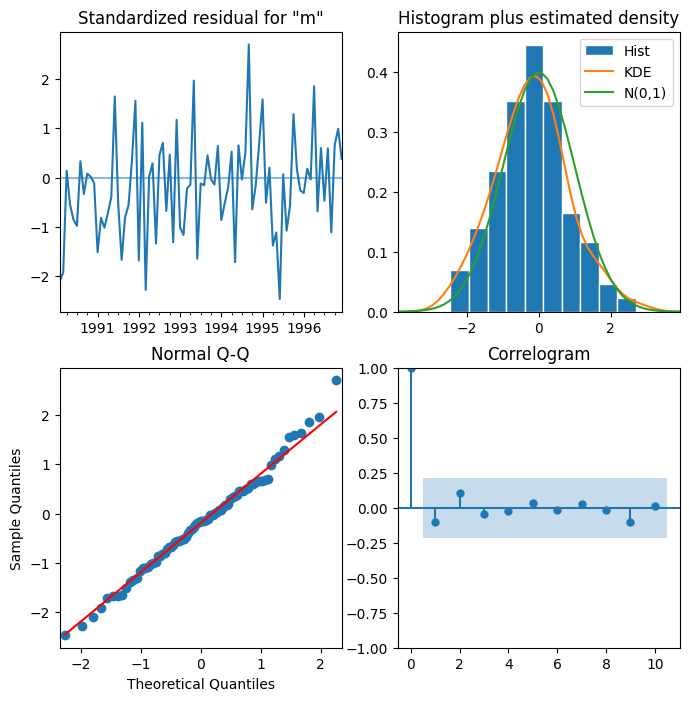

In [54]:
arima_1.plot_diagnostics(figsize=(8,8))
plt.show()

In [55]:
# Arima con variable exógena
# Variables
endog = catalog.loc[:, 'men']
exog = sm.add_constant(catalog.iloc[:, [3,5]])
#exog.mail=exog.mail**2
nobs = endog.shape[0]

# Fit the model
mod = sm.tsa.statespace.SARIMAX(endog.loc[:'1996-12-01'], 
                                exog=exog.loc[:'1996-12-01'], 
                                order = (0, 1, 1), 
                                seasonal_order =(0, 1, 1, 12))

fit_res = mod.fit(disp=False, maxiter=250)
fit_res.summary()



C:\Users\Guille\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Guille\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                men   No. Observations:                   96
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -775.572
Date:                            Sat, 24 Feb 2024   AIC                           1563.143
Time:                                    12:58:23   BIC                           1577.656
Sample:                                01-01-1989   HQIC                          1568.974
                                     - 12-01-1996                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.393e+04   5455.949     -2.552      0.011   -2.46e+04   -3232.171
mail           2.0240      0.618      3.276      0.001       0.813       3.235
phone        373.4100     51.294      7.280      0.000     272.875     473.944
ma.L1         -1.0000      0.115     -8.696      0.000      -1.225      -0.775
ma.S.L12      -0.6730      0.121     -5.576      0.000      -0.910      -0.436
sigma2      7.006e+06   1.64e-08   4.27e+14      0.000    7.01e+06    7.01e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                40.25
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                             0.93
Prob(H) (two-sided):                  0.10   Kurtosis:                         5.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.73e+38. Standard errors may be unstable.
"""

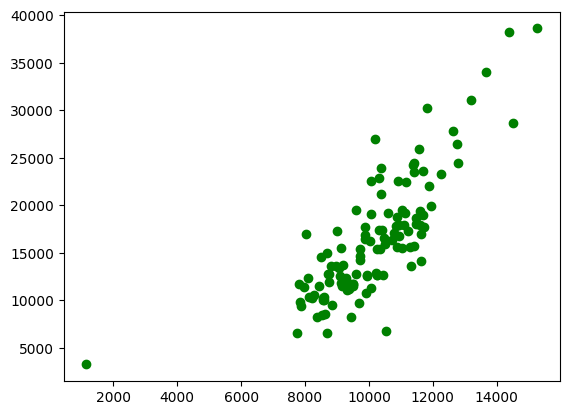

In [56]:
plt.scatter(exog.mail,endog, color="green")

In [57]:
sm.stats.acorr_ljungbox(fit_res.resid, lags=12, return_df=True)

,lb_stat,lb_pvalue
1,0.000104,0.991847
2,0.126683,0.938623
3,1.443341,0.695408
4,1.770490,0.777877
5,3.683335,0.595846
6,3.724530,0.713896
7,3.840404,0.797965
8,4.541198,0.805297
9,4.948626,0.838763
10,5.016870,0.890048


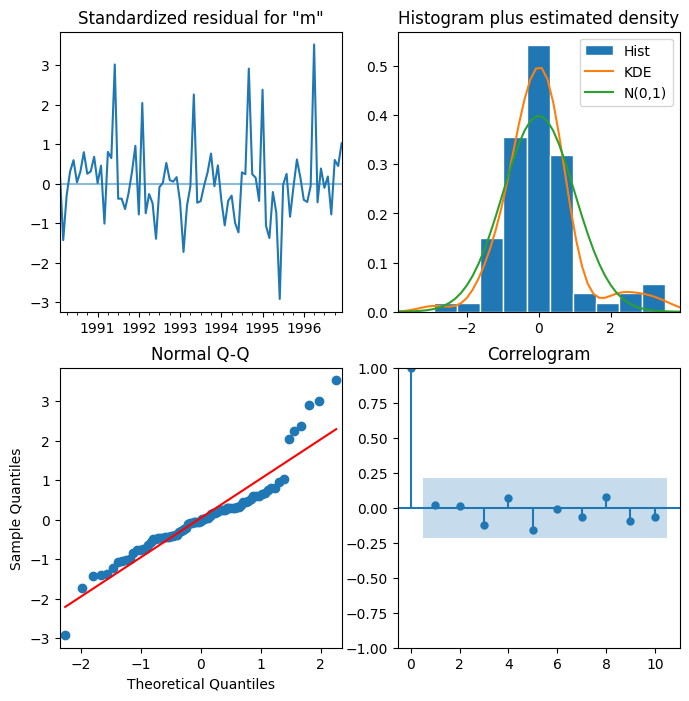

In [58]:
fit_res.plot_diagnostics(figsize=(8,8))
plt.show()

In [59]:
mod = sm.tsa.statespace.SARIMAX(endog, exog=exog,  order = (0, 1, 1), 
                                seasonal_order =(0, 1, 1, 12))
res = mod.filter(fit_res.params)


# In-sample one-step-ahead predictions
predict = res.get_prediction()
predict_ci = predict.conf_int()

C:\Users\Guille\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Guille\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [60]:
sm.stats.acorr_ljungbox(res.resid, lags=12, return_df=True)


,lb_stat,lb_pvalue
1,0.014678,0.903572
2,0.074443,0.963463
3,1.475894,0.687845
4,1.601946,0.808442
5,4.942599,0.422926
6,5.255847,0.511442
7,5.674777,0.578195
8,6.273915,0.616579
9,6.713706,0.666899
10,6.735939,0.750117


In [61]:
import statsmodels.tsa.statespace.sarimax 
# Dynamic predictions
predict_dy = res.get_prediction(dynamic='1997-01-01')
predict_dy_ci = predict_dy.conf_int()

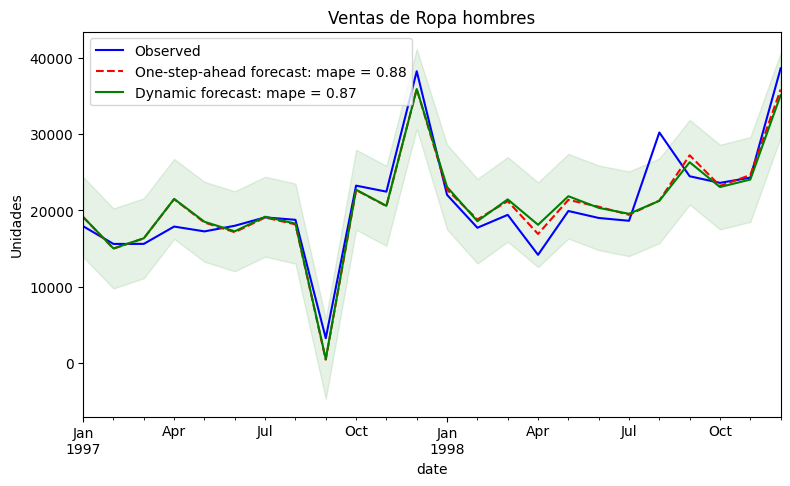

In [62]:

# Graph
fig, ax = plt.subplots(figsize=(9,5))
npre = 4
ax.set(title='Ventas de Ropa hombres', xlabel='Date', ylabel='Unidades')

date_ini='1997-01-01'

# Plot data points
test_real=catalog.loc[date_ini:, 'men']
test_real.plot(ax=ax, style='b', label='Observed')

# Plot predictions
pred_one=predict.predicted_mean.loc[date_ini:]
pred_one.plot(ax=ax, style='r--', label='One-step-ahead forecast: mape = '+ str(round(r2_score(test_real, pred_one),2)))
#ci = predict_ci.loc['1996-12-01':]
#ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)
round(mean_absolute_percentage_error(test_real, pred_one)*100,2)

pred_dyn=predict_dy.predicted_mean.loc[date_ini:]
pred_dyn.plot(ax=ax, style='g', label='Dynamic forecast: mape = '+ str(round(r2_score(test_real, pred_dyn),2)))
ci = predict_dy_ci.loc[date_ini:]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='g', alpha=0.1)

legend = ax.legend(loc='upper left')

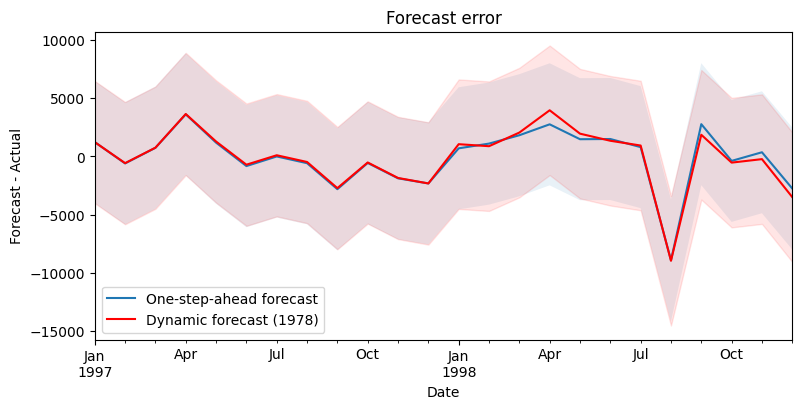

In [63]:
# Prediction error

# Graph
fig, ax = plt.subplots(figsize=(9,4))
npre = 4
ax.set(title='Forecast error', xlabel='Date', ylabel='Forecast - Actual')

# In-sample one-step-ahead predictions and 95% confidence intervals
predict_error = predict.predicted_mean - endog
predict_error.loc[date_ini::].plot(ax=ax, label='One-step-ahead forecast')
ci = predict_ci.loc[date_ini::].copy()
ci.iloc[:,0] -= endog.loc[date_ini::]
ci.iloc[:,1] -= endog.loc[date_ini::]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], alpha=0.1)

# Dynamic predictions and 95% confidence intervals
predict_dy_error = predict_dy.predicted_mean - endog
predict_dy_error.loc[date_ini::].plot(ax=ax, style='r', label='Dynamic forecast (1978)')
ci = predict_dy_ci.loc[date_ini::].copy()
ci.iloc[:,0] -= endog.loc[date_ini::]
ci.iloc[:,1] -= endog.loc[date_ini::]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)

legend = ax.legend(loc='lower left');
legend.get_frame().set_facecolor('w')

## Ajuste de los distintos modelos 

Calculemos mape y R2 para cada aproximación de predicciones obtenidas. 

In [64]:
# Arima (0,1,1)(0,1,1) exógenas con predicción dinámica
mape=mean_absolute_percentage_error(test_real, pred_dyn)
r2=r2_score(test_real, pred_dyn)
mape,r2

(0.11245671080598633, 0.8704323080695193)

In [65]:
# Arima (0,1,1)(0,1,1) exógenas con predicción  uno adelante
mean_absolute_percentage_error(test_real, pred_one),r2_score(test_real, pred_one)

(0.10931387164627498, 0.8795756829831979)

In [66]:
# Holt-Winters
pred_hw = hw_mul.forecast(steps=len(catalog_tst))
mean_absolute_percentage_error(test_real, pred_hw),r2_score(test_real, pred_hw)

(0.27921655520053473, 0.6662506710193441)

In [68]:
# Arima (0,1,1)(0,1,1)
pred_arima = arima_1.forecast(steps=len(catalog_tst))
mean_absolute_percentage_error(test_real, pred_arima),r2_score(test_real, pred_arima)

(0.36037733496898894, 0.5166394776173302)

C:\Users\Guille\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Guille\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


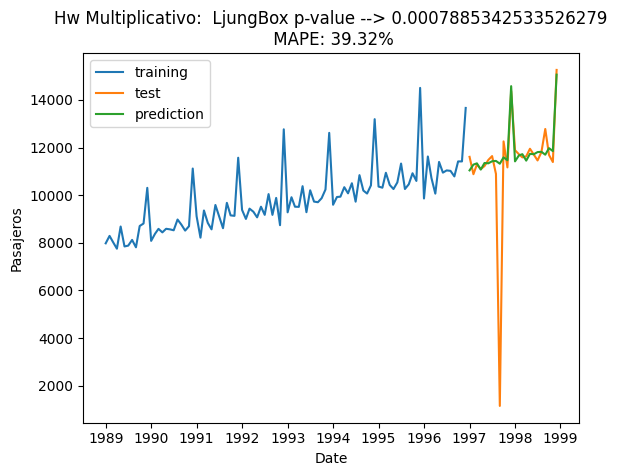

0.0007885342533526279


In [69]:
## Forecast de predictores

hw_mul = ets.ExponentialSmoothing(catalog_tr.mail,trend='add', damped_trend=False, seasonal='mul').fit()
hw_mul.summary()

eval_model(hw_mul,catalog_tr.mail,catalog_tst.mail,'Hw Multiplicativo')


C:\Users\Guille\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


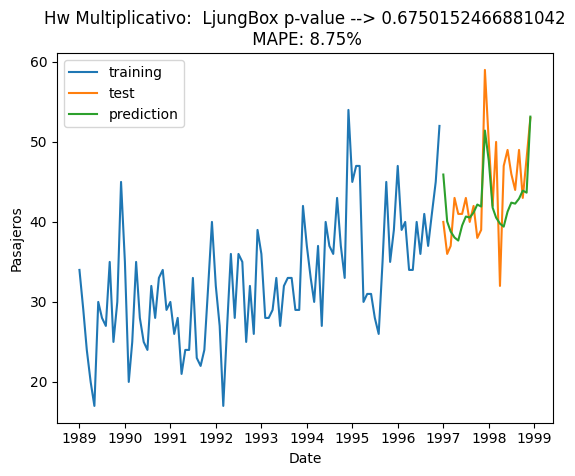

0.6750152466881042


In [35]:

hw_mul = ets.ExponentialSmoothing(catalog_tr.phone,trend='add', damped_trend=False, seasonal='add').fit()
hw_mul.summary()

eval_model(hw_mul,catalog_tr.phone,catalog_tst.phone,'Hw Multiplicativo')
